Cargue del dataset y configuración 


In [1]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import pandas as pd
import numpy as np
import string
import plotly
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

archivo_csv = "https://raw.githubusercontent.com/DidiGG/Bigdata.proyecto1.primer.parte/refs/heads/main/data/sdata.csv"
data = pd.read_csv(archivo_csv, nrows=5000)
data.head()
AllReviews = data['text']
AllReviews.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\didie/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
3    Love coming here. Yes the place always needs t...
4    Had their chocolate almond croissant and it wa...
Name: text, dtype: object

Exercise 1

In [2]:
# Print text of first Yelp review
AllReviews[0]

# sentence tokenization
sentences = nltk.sent_tokenize(AllReviews[0])
for sentence in sentences:
    print(sentence)
    print()

Super simple place but amazing nonetheless.

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.

Staff was very helpful and friendly.



Exercise 2

In [3]:
# Print text of first Yelp review 
AllReviews[0] 
# sentence tokenization 
sentences = nltk.sent_tokenize(AllReviews[0]) 
for sentence in sentences: 
 print(sentence) 
 print() 

Super simple place but amazing nonetheless.

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.

Staff was very helpful and friendly.



In [4]:
sentences = nltk.sent_tokenize(data['text'][1]) 
for sentence in sentences: 
 words = nltk.word_tokenize(sentence) 
 print(sentence) 
 print(words) 
 print() 

Small unassuming place that changes their menu every so often.
['Small', 'unassuming', 'place', 'that', 'changes', 'their', 'menu', 'every', 'so', 'often', '.']

Cool decor and vibe inside their 30 seat restaurant.
['Cool', 'decor', 'and', 'vibe', 'inside', 'their', '30', 'seat', 'restaurant', '.']

Call for a reservation.
['Call', 'for', 'a', 'reservation', '.']

We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains.
['We', 'had', 'their', 'beef', 'tartar', 'and', 'pork', 'belly', 'to', 'start', 'and', 'a', 'salmon', 'dish', 'and', 'lamb', 'meal', 'for', 'mains', '.']

Everything was incredible!
['Everything', 'was', 'incredible', '!']

I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go.
['I', 'could', 'go', 'on', 'at', 'length', 'about', 'how', 'all', 'the', 'listed', 'ingredients', 'really', 'make', 'their', 'dishes', 'amazing', 'but', 'honestly', 'you', 'just', 'need', '

Histograma

 Shortest review:
 Bon  Muffin !!! Succulent

 Longest review:
 First things first - I am a road cyclist and a spin class junkie (though I prefer the term "aficionado"). Last week, I posted the following to my Facebook status after yet another predictably boring YMCA spin class, "If 90+% of your class has us out of the saddle or doing ridiculous 'jumps', it's not a cycle class. It's an elliptical class. It is also a waste of my time."

After reading that Facebook status, a friend of mine sent me an invitation to the "Open House Week" at Flywheel Ballantyne. I had never heard of Flywheel before, but my friend said they were offering free classes all week and suggested we try them. I wrote her back saying, "Given what they charge, I'm interested in seeing how - if at all - this is different from a general spin class." Frankly, having spent hundreds of hours in YMCA spin classes over the past 3 years, I was not expecting much.

I told her as I gripped the handrail down to the parking lot 

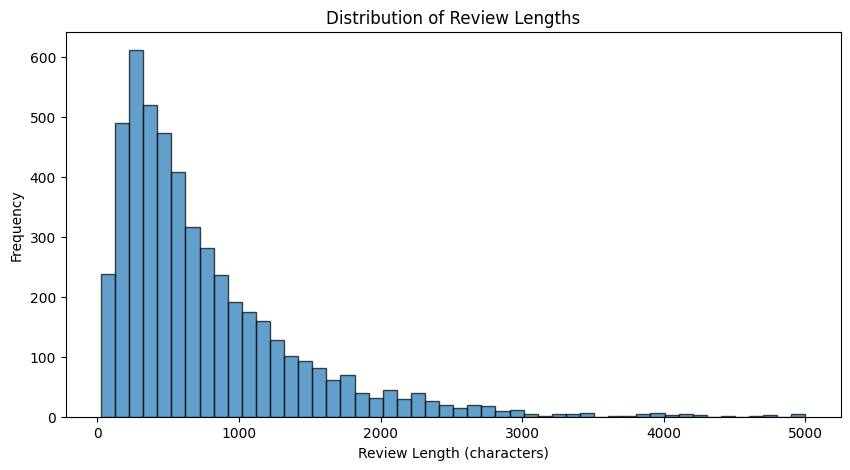

In [5]:
# Calcular la longitud de cada reseña
data['review_length'] = data['text'].apply(len)

# Hallamos la reseña más corta y la mpás larga
shortest_review = data.loc[data['review_length'].idxmin(), 'text'] #minima
longest_review = data.loc[data['review_length'].idxmax(), 'text'] #máxima

print(" Shortest review:\n", shortest_review)
print("\n Longest review:\n", longest_review)

# Graficar histograma de la distribución
plt.figure(figsize=(10, 5))
plt.hist(data['review_length'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()


Word clouds

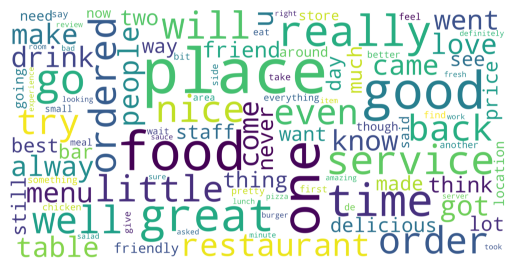

In [6]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
word_cloud_text = ''.join(data.text) 
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",
 scale = 10,width=800, height=400).generate(word_cloud_text) 
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show() 

Exercise 3

   """
    Genera una nube de palabras para las reseñas con un número específico de estrellas.
    
    Parámetros:
    - data: DataFrame de Pandas con columnas 'text' y 'stars'.
    - star_value: Número de estrellas (1 a 5) para filtrar las reseñas.
    
    Retorna:
    - Una visualización de la nube de palabras.
    """

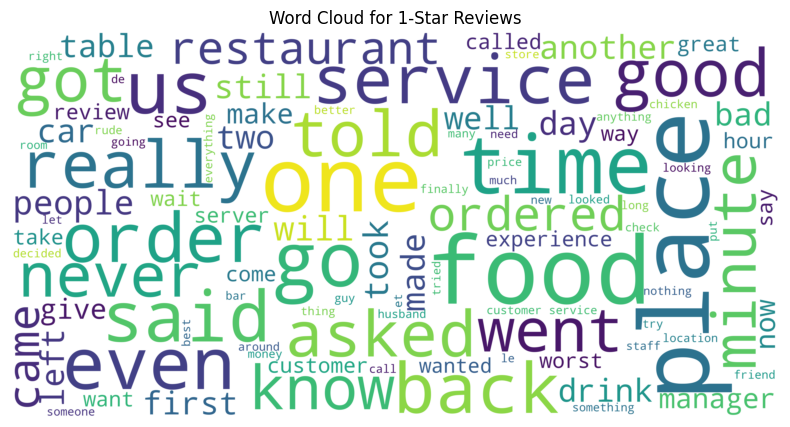

In [7]:
def word_cloud_rating(data, star_value):

    # Filtrar las reseñas con la cantidad de estrellas deseada
    filtered_data = data[data['stars'] == star_value]
    
    # Unir el texto de las reseñas en un solo string
    word_cloud_text = ' '.join(filtered_data['text'])

    # Generar la nube de palabras
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="white",
        scale=10,
        width=800,
        height=400
    ).generate(word_cloud_text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {star_value}-Star Reviews")
    plt.show()

# Ejemplo de uso para reseñas de 1 estrella
word_cloud_rating(data, 1)


Exercise 4

In [8]:
from textblob import TextBlob

# Función para obtener el sentimiento de una reseña
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Valor entre -1 (negativo) y 1 (positivo)

# Aplicar análisis de sentimiento
data['sentiment'] = data['text'].apply(get_sentiment)

# Filtrar reseñas negativas (polarity < 0)
negative_reviews = data[data['sentiment'] < 0]

# Extraer frases que contienen "good" en reseñas negativas
negative_reviews_with_good = negative_reviews[negative_reviews['text'].str.contains(r'\bgood\b', case=False, na=False)]

# Mostrar algunas reseñas donde aparece "good" en comentarios negativos
for review in negative_reviews_with_good['text'].head(5):
    print("🔹 Review:", review)
    print("-" * 80)


🔹 Review: Horrible customer service!! Warning do not purchase anything from here, don't waste your time!!! Purchased $2,500 worth of furniture told sells person numerous times to deliver furniture in original boxes I didn't want it assembled.  Well received my delivery and everything was assembled!!!!! $700 table was damaged!!!! Living room furniture was stuffed in delivery truck with people's nasty old mattress....completely unprofessional and not worth it!!! Sent my whole order back for refund!! Called customer service talked with a guy named Chris, the absolute worst customer service agent I've ever spoken too.....Was missing the love seat, well guess what it's completely sold out.  Please spare your time and money! Don't waste it here, furniture might be good price but not worth the experience. I must save delivery guys were very nice.
--------------------------------------------------------------------------------
🔹 Review: Worst experience EVER! I had been there before to get my 

Exercise 5

In [9]:
from collections import Counter
from nltk.tokenize import word_tokenize
import string

reviews = data['text'].dropna().tolist()  

# Tokenizar y limpiar el texto
words = []
for review in reviews:
    tokens = word_tokenize(review.lower())  # Convertir a minúsculas
    tokens = [word for word in tokens if word.isalpha()]  # Eliminar signos de puntuación y números
    words.extend(tokens)  # Agregar las palabras a la lista general

# Contar la frecuencia de las palabras
word_counts = Counter(words)

# Determinar el umbral para el 1% de palabras más y menos frecuentes
total_words = len(word_counts)
top_1_percent = max(1, int(total_words * 0.01))  # Garantiza al menos una palabra
bottom_1_percent = top_1_percent  # Se usa la misma cantidad para ambos extremos

# Ordenar las palabras por frecuencia
sorted_words = word_counts.most_common()

# Obtener palabras de alta frecuencia (top 1%) y baja frecuencia (bottom 1%)
high_freq_words = [word for word, count in sorted_words[:top_1_percent]]
low_freq_words = [word for word, count in sorted_words[-bottom_1_percent:]]

# Imprimir los resultados
print("Palabras de alta frecuencia:", high_freq_words)
print("Palabras de baja frecuencia:", low_freq_words)


Palabras de alta frecuencia: ['the', 'and', 'i', 'a', 'to', 'was', 'it', 'of', 'is', 'for', 'in', 'that', 'you', 'my', 'with', 'they', 'but', 'this', 'on', 'we', 'have', 'not', 'had', 'so', 'were', 'are', 'at', 'as', 'there', 'be', 'place', 'good', 'me', 'food', 'here', 'if', 'all', 'out', 'just', 'do', 'one', 'very', 'like', 'great', 'would', 'when', 'their', 'up', 'time', 'from', 'or', 'get', 'our', 'really', 'which', 'did', 'some', 'an', 'back', 'also', 'service', 'go', 'what', 'about', 'your', 'can', 'been', 'will', 'more', 'no', 'only', 'she', 'well', 'them', 'by', 'because', 'nice', 'little', 'he', 'ordered', 'other', 'has', 'could', 'than', 'even', 'too', 'us', 'try', 'always', 'came', 'after', 'menu', 'pretty', 'got', 'love', 'order', 'much', 'people', 'first', 'de', 'two', 'never', 'staff', 'restaurant', 'chicken', 'come', 'bar', 'off', 'best', 'make', 'went', 'definitely', 'friendly', 'over', 'again', 'delicious', 'know', 'made', 'then', 'how', 'around', 'think', 'though', 's

Exercise 6

 """
    Encuentra los k n-gramas más frecuentes en una lista de tokens.

    Parámetros:
        word_tokens (list): Lista de palabras tokenizadas.
        n (int): Tamaño del n-grama (1 para unigramas, 2 para bigramas, ...).
        k (int): Número de n-gramas más frecuentes a devolver.

    Retorna:
        Lista de los k n-gramas más comunes junto con su frecuencia.
    """

In [10]:
from nltk.util import ngrams

def top_k_ngrams(word_tokens, n, k):
   
    ngram_counts = Counter(ngrams(word_tokens, n))
    return ngram_counts.most_common(k)

# Obtener las primeras 1000 reseñas
reviews = data['text'].dropna().head(1000).tolist()

# Tokenizar las reseñas
word_tokens = []
for review in reviews:
    tokens = word_tokenize(review.lower())  # Convertir a minúsculas y tokenizar
    tokens = [word for word in tokens if word.isalpha()]  # Filtrar solo palabras
    word_tokens.extend(tokens)  # Agregar a la lista general

# Obtener los top 10 n-gramas
top_10_unigrams = top_k_ngrams(word_tokens, 1, 10)
top_10_bigrams = top_k_ngrams(word_tokens, 2, 10)
top_10_trigrams = top_k_ngrams(word_tokens, 3, 10)

# Imprimir resultados
print("Top 10 unigramas:", top_10_unigrams)
print("Top 10 bigramas:", top_10_bigrams)
print("Top 10 trigramas:", top_10_trigrams)


Top 10 unigramas: [(('the',), 8623), (('i',), 5953), (('and',), 5587), (('a',), 4846), (('to',), 4403), (('it',), 3333), (('was',), 3069), (('of',), 2876), (('is',), 2097), (('in',), 2020)]
Top 10 bigramas: [(('it', 'was'), 643), (('of', 'the'), 606), (('in', 'the'), 548), (('i', 'was'), 535), (('and', 'the'), 456), (('on', 'the'), 422), (('and', 'i'), 416), (('this', 'place'), 373), (('i', 'had'), 355), (('if', 'you'), 308)]
Top 10 trigramas: [(('one', 'of', 'the'), 81), (('the', 'food', 'is'), 77), (('and', 'it', 'was'), 75), (('the', 'food', 'was'), 74), (('it', 'was', 'a'), 74), (('this', 'place', 'is'), 73), (('a', 'lot', 'of'), 68), (('this', 'is', 'a'), 68), (('the', 'service', 'was'), 53), (('on', 'the', 'menu'), 50)]


Stop Words

In [11]:
nltk.download('stopwords') 
from nltk.corpus import stopwords 
print(stopwords.words("english")) 
print(stopwords.words("spanish")) 

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exercise 7.1

In [12]:
# Obtener la primera reseña
first_review = data['text'].dropna().iloc[0]

# Tokenizar la reseña
tokens = word_tokenize(first_review.lower())  # Convertir a minúsculas y tokenizar

# Obtener lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Filtrar palabras que no sean stopwords
filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]

# Extraer las palabras que fueron eliminadas (stopwords encontradas)
found_stopwords = [word for word in tokens if word in stop_words]

# Imprimir resultados
print("Palabras sin stopwords:", filtered_words)
print("\nStopwords encontradas:", found_stopwords)


Palabras sin stopwords: ['super', 'simple', 'place', 'amazing', 'nonetheless', 'around', 'since', 'still', 'serve', 'thing', 'started', 'bologna', 'salami', 'sandwich', 'mustard', 'staff', 'helpful', 'friendly']

Stopwords encontradas: ['but', 'it', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and']


Exercise 7.2

 """
    Función para calcular los n-gramas más frecuentes después de eliminar stopwords.
    
    Parámetros:
    - word_tokens: lista de palabras tokenizadas.
    - n: tamaño del n-grama (1 para unigramas, 2 para bigramas, etc.).
    - k: cantidad de n-gramas más frecuentes a devolver.
    
    Retorna:
    - Lista de los k n-gramas más comunes.
    """

In [13]:
def top_k_ngrams(word_tokens, n, k):
   
    stop_words = set(stopwords.words('english'))  # Obtener lista de stopwords en inglés

    # Filtrar stopwords y palabras de 2 caracteres o menos (para evitar puntuaciones)
    filtered_tokens = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words and len(word) > 2]

    # Generar n-gramas
    n_grams = list(ngrams(filtered_tokens, n))

    # Contar la frecuencia de los n-gramas
    ngram_freq = Counter(n_grams)

    # Obtener los k n-gramas más comunes
    top_ngrams = ngram_freq.most_common(k)

    return top_ngrams

first_1000_reviews = ' '.join(data['text'].dropna().iloc[:1000])  # Concatenar primeras 1000 reseñas
tokens = word_tokenize(first_1000_reviews)  # Tokenizar palabras

# Obtener los 10 trigramas más comunes
top_trigrams = top_k_ngrams(tokens, n=3, k=10)
print(top_trigrams)


[(('wait', 'come', 'back'), 11), (('las', 'vegas', 'strip'), 8), (('give', 'place', 'try'), 7), (('staff', 'friendly', 'helpful'), 7), (('vegas', 'nearly', 'years'), 7), (('half', 'dozen', 'times'), 7), (('maps', 'maps', 'maps'), 7), (('first', 'time', 'went'), 6), (('lived', 'vegas', 'nearly'), 6), (('win', 'win', 'win'), 6)]


Exercise 8.1

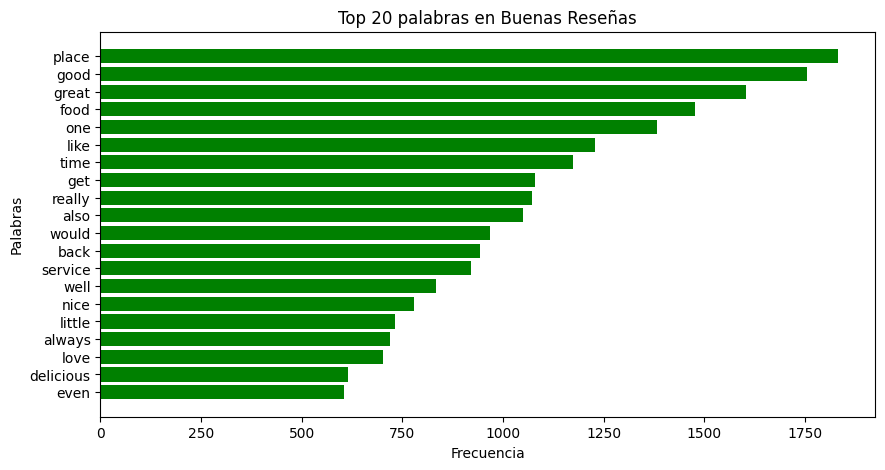

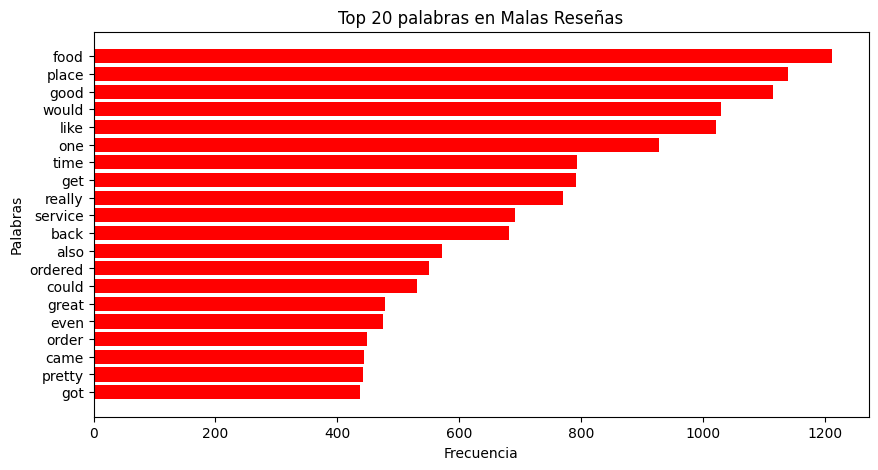

In [15]:
# Filtrar "buenas" (estrellas > 3) y "malas" (estrellas <= 3) reseñas
good_reviews = data[data['stars'] > 3]['text'].dropna().str.cat(sep=' ')
bad_reviews = data[data['stars'] <= 3]['text'].dropna().str.cat(sep=' ')

# Tokenizar palabras
good_tokens = word_tokenize(good_reviews.lower())
bad_tokens = word_tokenize(bad_reviews.lower())

# Filtrar stopwords y palabras cortas
stop_words = set(stopwords.words('english'))
good_tokens = [word for word in good_tokens if word.isalpha() and word not in stop_words and len(word) > 2]
bad_tokens = [word for word in bad_tokens if word.isalpha() and word not in stop_words and len(word) > 2]

# Contar frecuencia de palabras
good_freq = Counter(good_tokens).most_common(20)
bad_freq = Counter(bad_tokens).most_common(20)

# Función para graficar las palabras más frecuentes
def plot_word_frequencies(freq_data, title, color):
    words, counts = zip(*freq_data)
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], counts[::-1], color=color)
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabras")
    plt.title(title)
    plt.show()

# Graficar palabras más frecuentes en buenas y malas reseñas
plot_word_frequencies(good_freq, "Top 20 palabras en Buenas Reseñas", color="green")
plot_word_frequencies(bad_freq, "Top 20 palabras en Malas Reseñas", color="red")


Exercise 8.2

In [18]:
# Función para preprocesar texto
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convertir a minúsculas y tokenizar
    tokens = [word for word in tokens if word.isalnum()]  # Eliminar puntuación
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Filtrar stopwords
    return tokens

# Función para obtener los n-gramas más frecuentes
def get_top_n_words(reviews, n, top_k):
    all_ngrams = []
    for review in reviews:
        tokens = preprocess_text(review)
        n_grams = list(ngrams(tokens, n))  
        all_ngrams.extend(n_grams)

    freq_dist = Counter(all_ngrams)  
    return freq_dist.most_common(top_k)


# Obtener los 20 bigramas y trigramas más frecuentes en buenas y malas reseñas
top_20_bigrams_good = get_top_n_words(good_reviews, 2, 20)
top_20_bigrams_bad = get_top_n_words(bad_reviews, 2, 20)
top_20_trigrams_good = get_top_n_words(good_reviews, 3, 20)
top_20_trigrams_bad = get_top_n_words(bad_reviews, 3, 20)

# Función para graficar n-gramas
def plot_ngrams(top_ngrams, title):
    ngrams, counts = zip(*top_ngrams)
    ngrams = [' '.join(ng) for ng in ngrams]  # Convertir tuplas a strings
    plt.figure(figsize=(10,5))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('N-gramas')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invertir eje Y para mejor visualización
    plt.show()

# Graficar los resultados
plot_ngrams(top_20_bigrams_good, "Top 20 Bigrams - Good Reviews")
plot_ngrams(top_20_bigrams_bad, "Top 20 Bigrams - Bad Reviews")
plot_ngrams(top_20_trigrams_good, "Top 20 Trigrams - Good Reviews")
plot_ngrams(top_20_trigrams_bad, "Top 20 Trigrams - Bad Reviews")


KeyboardInterrupt: 